### Project Overview: Customer Churn Prediction for SyriaTel

## 1. Business Understanding

SyriaTel, like many telecom providers, operates in a highly competitive industry where retaining existing customers is often more cost-effective than acquiring new ones. Customer churn — when subscribers stop using the service — directly impacts revenue and long-term profitability.

The challenge is that churn doesn't usually happen randomly. It can result from dissatisfaction with service quality, pricing, customer support, or competitors' offers. If SyriaTel can predict which customers are likely to churn, it can act proactively to retain them through targeted interventions.

### 2. Business Goal
To reduce customer churn and increase customer lifetime value (CLTV) by identifying subscribers who are most likely to leave soon.

Specifically:

i)  Build a Predictive Model for Churn

ii) Gain Insight into Churn Drivers

iii) Provide Strategic Recommendations


## 3 Intended Audience

a. Telecom Business Executives: Need insights into churn trends, retention ROI, and how churn relates to product pricing.

b. Marketing & Customer Retention Teams: Need a list of high-risk customers for proactive targeting.

c. Customer Experience/Call Center Managers: Want to understand which service areas such customer service calls correlate with churn.

In [98]:
# importing necessary libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate,cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,make_scorer,roc_curve, auc, classification_report,average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib



### 1. Loading Dataset

In [99]:
# Load the dataset
df=pd.read_csv('Data/bigml.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 2. Data Cleaning & Preprocessing

After loading the dataset, the first step is to explore and understand its structure. This helps identify any data quality issues and guides the preprocessing steps. The .info() function is useful for checking the column names, data types, and whether there are any missing values in the dataset.

In [100]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the dataset, there is a total of 21 columns with 3,333 entries and no missing values. The .info() function confirms that all columns are fully populated. The dataset contains a mix of **categorical variables** e.g., state, international plan, voice mail plan, churn and **numerical variables** e.g., total day minutes, customer service calls, account length.

#### 2.2 Checking for missing values

In [101]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

From the table above, we observe that there are no missing values in the dataset. This eliminates the need for extensive data cleaning steps such as imputation or row removal. Therefore, we proceed directly to data preprocessing, which involves preparing the dataset for modeling. This includes steps such as encoding categorical variables, dropping irrelevant columns, handling class imbalance, and scaling features where necessary to ensure optimal model performance.

### 2.3 Dropping Columns
At this stage, columns that do not contribute to the predictive power of the model are dropped. These may include identifiers or any other fields that are either constant or irrelevant to the target variable. Keeping such columns can introduce noise, increase the risk of overfitting, and reduce the model's overall accuracy. By removing them, we ensure the model focuses on the most informative features.

In [102]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Now safely drop the columns
df.drop(columns=['phone number', 'area code', 'state'], inplace=True)

At this stage, initial statistical exploration is conducted using the .describe() method to summarize the central tendencies, dispersion, and shape of the distribution of numerical features in the dataset. This step provides insights into the range, mean, standard deviation, and presence of outliers, helping to identify potential data quality issues and detect early patterns that may influence customer churn. By understanding these basic statistics, we can better guide subsequent preprocessing or modeling steps.

## 2.4 Exploratory Data Analysis (EDA)

### 2.4.1 Descriptive Analysis

The .describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution for each numerical feature

In [103]:
# descriptive statistics for numerical columns
df_numerical=df[['total day minutes', 'total intl charge', 'total day calls', 'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls', 'customer service calls']]
df_numerical.describe()

,total day minutes,total intl charge,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,2.764581,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856
std,54.467389,0.753773,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000
25%,143.700000,2.300000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000
50%,179.400000,2.780000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000
75%,216.400000,3.270000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000
max,350.800000,5.400000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000


### 2.4.2 Checking and Handling Class Imbalance 

Before training a model, it's important to check if the dataset is imbalanced — that is, whether one class dominates the other.A highly imbalanced dataset can cause the model to be biased toward the majority class, leading to poor performance on the minority class 

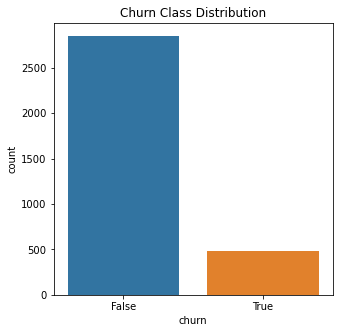

False    0.855086
True     0.144914
Name: churn, dtype: float64


In [104]:
# Check for class imbalance in the target variable 'churn'
# plotting the distribution of the target variable 'churn'
plt.figure(figsize=(5, 5))
sns.countplot(x='churn', data=df)
plt.title('Churn Class Distribution')
plt.show()

print(df['churn'].value_counts(normalize=True))

From the plot above, 85.5% of customers did not churn, while only 14.5% did churn. This indicates a class imbalance in the dataset, which may require special handling during model training to ensure the minority class (churners) is not overlooked.

### 2.4.3 Encode Categorical Variables

To prepare the dataset for modeling, categorical variables need to be converted into numeric format.

a) Binary Categories
Columns: international plan, voice mail plan
Values: 'yes', 'no'

These binary categories can be easily encoded by mapping 'yes' to 1 and 'no' to 0.

In [105]:
# Encode categorical variables
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].astype(int)




In [106]:
# display the first few rows of the encoded categorical variables
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 2.4.4 One Hot Encoding

Performing one-hot encoding on categorical columns such as international plan & voice mail plan allows us to convert these non-numeric features into a numerical format suitable for machine learning models.

In [107]:
# one hot encoding for categorical variables
df_enconded = pd.get_dummies(df, columns=['international plan', 'voice mail plan'], drop_first=True)
df_enconded.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_1,voice mail plan_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


### 2.4.5 Checking Correlation

Checking correlation is a fundamental step in exploratory data analysis to understand the strength and direction of linear relationships between numerical variables.

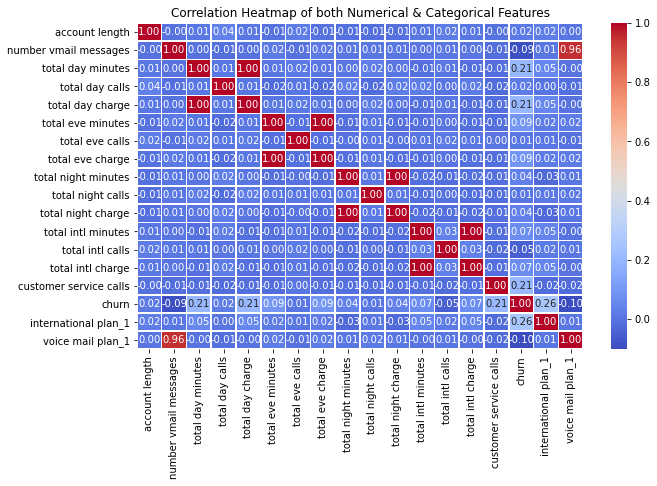

In [108]:
# correlation between  churn and other features
plt.figure(figsize=(10, 6))
sns.heatmap(df_enconded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of both Numerical & Categorical Features')
plt.show()

From the heatmap above, it can be observed that international_plan_Yes has the highest positive correlation with churn (0.26), indicating that customers subscribed to the international plan are more likely to churn—though the relationship is still considered weak. This is followed by customer service calls, total day charge, and total day minutes, each showing a correlation of approximately 0.21 with churn.

All other features exhibit very weak correlations, ranging between -0.02 and 0.09, suggesting no strong linear relationship with churn and reducing concerns about multicollinearity among the  variables.

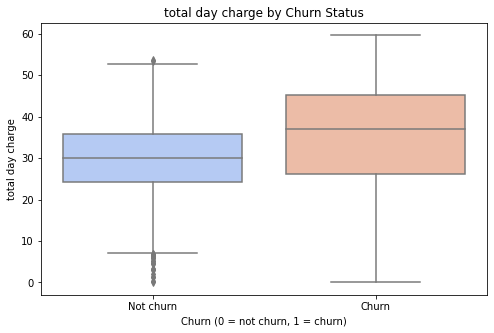

In [109]:
# Box plot of total day charge by churn status
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_enconded, x='churn', y='total day charge', palette='coolwarm')
plt.title('total day charge by Churn Status')
plt.xlabel('Churn (0 = not churn, 1 = churn)')
plt.ylabel('total day charge')
plt.xticks(ticks=[0, 1], labels=['Not churn', 'Churn'])
plt.show()

From the box plot above, it is evident that customers who churned tend to have a higher median total day charge compared to those who did not churn. This suggests that higher daytime usage — and consequently higher charges — may be associated with an increased likelihood of churn. It could indicate that high-usage customers may feel they are not receiving sufficient value for money, or they may be more sensitive to pricing and therefore more likely to explore alternative service providers.

# 3.0 Modelling 

### 3.1 Splitting the Data

To build a reliable churn prediction model, the dataset is divided into training and testing subsets. This allows the model to learn patterns from historical data and then be evaluated on unseen data to assess its performance.

In [110]:
# Split the dataset into features and target variable
X = df_enconded.drop(columns=['churn'])
y= df_enconded['churn']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42, stratify=y)

In [111]:
# Identify Categorical & Numerical Columns
# Categorical columns are assumed to be binary after one-hot encoding (values: 0 or 1)
categorical_cols = [col for col in X_train.columns if X_train[col].nunique() == 2 and set(X_train[col].unique()).issubset({0, 1})]
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

### 3.2 Feature Scaling

Feature scaling is an essential preprocessing step in machine learning that ensures all numerical features contribute equally to the model’s learning process. This is especially important for distance-based or regularization-sensitive algorithms

In [112]:
scaler = StandardScaler()

X_train_scaled_num = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled_num = scaler.transform(X_test[numerical_cols])

In [113]:
# Convert back to DataFrame to retain column names
X_train_scaled_num_df = pd.DataFrame(X_train_scaled_num, columns=numerical_cols, index=X_train.index)
X_test_scaled_num_df = pd.DataFrame(X_test_scaled_num, columns=numerical_cols, index=X_test.index)

# 5. Concatenate Scaled Numerics + Categorical Columns
# This step combines the scaled numerical features with the original categorical features, ensuring that all features are ready for modeling.
X_train_prepared = pd.concat([X_train_scaled_num_df, X_train[categorical_cols]], axis=1)
X_test_prepared = pd.concat([X_test_scaled_num_df, X_test[categorical_cols]], axis=1)

### 3.3 Handling Class Imbalance using SMOTE

To address the imbalance between churned and non-churned customers in the training dataset, SMOTE is applied. SMOTE works by generating synthetic samples for the minority class (churn = 1), allowing the model to better learn the patterns associated with customer churn without simply duplicating existing records.

In [114]:
smote= SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prepared, y_train)
# Check the class distribution after resampling
print(y_train_resampled.value_counts(normalize=True))



0    0.5
1    0.5
Name: churn, dtype: float64


The results indicate that the target variable, churn, is now perfectly balanced in the resampled training dataset. Specifically, 50% of the samples represent customers who did not churn (class 0), while the remaining 50% represent those who did churn (class 1).

This balance is significant because, prior to applying SMOTE, the dataset suffered from class imbalance—where churned customers formed a smaller portion of the data. Such imbalance can lead to biased models that are more accurate in predicting the majority class but perform poorly in identifying churners.

### 3.4 Train Logistic Regression Model

After handling class imbalance with SMOTE and scaling the numerical features, we proceed to train a Logistic Regression model. Logistic Regression is a widely used classification algorithm that estimates the probability of a binary outcome — in this case, whether a customer will churn or not. This step involves fitting the model on the resampled training data and evaluating its performance on the test set to assess its predictive power.

In [115]:
#logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)




LogisticRegression(random_state=42)

In [116]:
# Predicting  the test set
y_pred = model.predict(X_test_prepared)

accuracy = accuracy_score(y_test, y_pred)

### 3.4.1 Model Evaluation

This section assesses the performance of the developed models using appropriate evaluation metrics. By comparing accuracy, AUC-ROC scores,precision,recall,F1 score and cross-validation results, we determine how well each model distinguishes between churned and non-churned customers. The goal is to identify the most reliable and generalizable model for predicting customer churn.


In [117]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Logistic Regression - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

Logistic Regression - Accuracy: 0.72, Precision: 0.30, Recall: 0.71, F1 Score: 0.42


The performance metrics for the Logistic Regression model indicate the following:

Accuracy (0.72): The model correctly predicts churn or non-churn for 72% of the test data. While this seems fairly good, accuracy alone can be misleading in imbalanced datasets (though we handled imbalance with SMOTE), so we need to look deeper.

Precision (0.30): Out of all the customers predicted to churn, only 30% actually did. This suggests that the model has a relatively high number of false positives — it's often flagging non-churners as churners.

Recall (0.71): The model correctly identifies 71% of actual churners. This is a strong point, as it means the model is effective at capturing most of the customers who are at risk of churning.

F1 Score (0.42): The F1 Score balances precision and recall. A score of 0.42 indicates moderate overall performance, leaning toward better recall than precision.

### 3.4.2 Evaluation Using Confusion Matrix


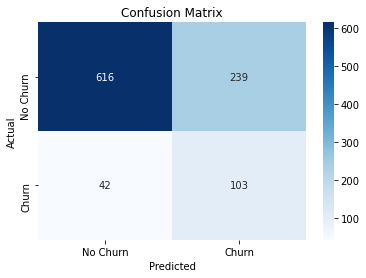

In [118]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


True Negatives (TN) = 616:
These are customers who did not churn and the model correctly predicted they wouldn’t churn.

False Positives (FP) = 239:
These are customers who did not churn but the model incorrectly predicted they would churn. This is a type I error.

False Negatives (FN) = 42:
These are customers who did churn but the model missed them, predicting they wouldn’t. This is a type II error.

True Positives (TP) = 103:
These are customers who did churn, and the model correctly identified them.



 ### 3.4.3 Add ROC Curve

 To better evaluate the performance of our Logistic Regression model beyond accuracy, precision, and recall,the Receiver Operating Characteristic (ROC) Curve is used. The ROC Curve provides a visual representation of the trade-off between the true positive rate (recall) and the false positive rate at various threshold settings.

By plotting this curve, we can assess how well the model distinguishes between the churn and non-churn classes across different decision thresholds. The Area Under the Curve (AUC) summarizes the overall ability of the model to discriminate between the two classes — with values closer to 1 indicating better performance.

In [119]:
# predict probabilities for the positive class (churn)
y_pred_probs = model.predict_proba(X_test_prepared)[:, 1]  # probability of class 1 (churn)


### 3.4.3.1 Compute ROC Curve Values



In [120]:
# Calculate ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)


In [121]:
# Cross-validation for Logistic Regression
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print(f'Logistic Regression Cross-Validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')

Logistic Regression Cross-Validation Accuracy: 0.75 ± 0.01


 On average, the logistic regression model correctly classified 75% of the samples across the 5 cross-validation folds. A 75% accuracy suggests the model is doing a fairly good job at distinguishing between churned and non-churned customers on the training data.

### 3.4.3.2 Plotting the ROC Curve

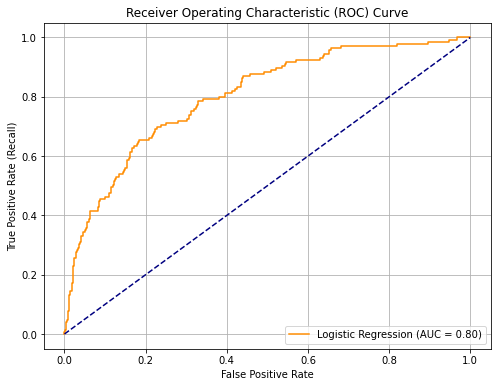

In [122]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_probs)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [123]:
# calculating Area Under the Curve (AUC) Score
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC Score: {auc_score:.4f}")


AUC Score: 0.8015


An AUC score of 0.8015 means there is approximately an 80.15% chance that the model will correctly rank a randomly chosen churned customer (class 1) higher than a randomly chosen non-churned customer (class 0). It reflects strong overall model performance, especially in ranking predictions rather than classifying them outright.

## 3.5 Random Forest and Decision trees & Random Forest

To further improve the prediction of customer churn and determine the most effective classification model, this study trains additional models — starting with Decision Trees then Random forest model.

By evaluating performance metrics such as accuracy, precision, recall, F1-score, and AUC, this model will be compared to Logistic Regression to assess whether these models  offer  better predictive capabilities — especially for identifying customers likely to churn.

### 3.5.1 Training Using Decision Trees & Random forest

 Decision Trees are intuitive and easy-to-interpret models that split the data based on feature thresholds, forming a tree-like structure of decisions.

In [124]:
# fitting a decision tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # You can tune depth later
dt_model.fit(X_train_resampled, y_train_resampled)

# fitting a random forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)  # You can tune n_estimators and depth later
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(max_depth=5, random_state=42)

In [125]:
# predicting with decision tree model
dt_y_pred = dt_model.predict(X_test_prepared)

# predicting with random forest model
rf_y_pred = rf_model.predict(X_test_prepared)


### 3.5.2 Evaluating the 2 Models

Accuracy score, precision, recall, F1-score, and the confusion matrix are used to evaluate the performance of the Decision Tree model. These metrics provide a comprehensive understanding of how well the model predicts both churned and non-churned customers.

### 3.5.2.1 evaluate the Random Forest model

In [126]:
# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred) 
print(f'Decision Tree - Accuracy: {dt_accuracy:.2f}, Precision: {dt_precision:.2f}, Recall: {dt_recall:.2f}')

Decision Tree - Accuracy: 0.88, Precision: 0.56, Recall: 0.75


**Decision Tree Evaluation Results**

Accuracy: 0.88
This means that 88% of the predictions made by the model (both churned and non-churned customers) were correct. It shows high overall performance.

Precision: 0.56
Of all the customers the model predicted would churn, 56% actually did. While this is better than random guessing, there is still room for improvement—almost half of the positive predictions were false positives.

Recall: 0.75
The model correctly identified 75% of all actual churned customers. This is relatively high and indicates the model is good at detecting most of the customers at risk of churning.

**Conclusion**

The Decision Tree model shows strong overall accuracy and good recall, meaning it’s effective at catching most of the churn cases. However, its precision suggests it also misclassifies a significant number of non-churners as churners

### 3.5.2.2 evaluate the Random Forest model

In [127]:
# evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
print(f'Random Forest - Accuracy: {rf_accuracy:.2f}, Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}')

Random Forest - Accuracy: 0.90, Precision: 0.64, Recall: 0.73


**Evaluation of Random forest**

Accuracy: 90%
The model correctly predicted the outcome (churn or no churn) for 90% of the customers in the test dataset. This high accuracy indicates strong overall predictive power.

Precision: 64%
Out of all the customers predicted to churn, 64% actually did. This suggests that the model is reasonably good at minimizing false positives (predicting churn when there is none), though there’s still room for improvement.

Recall: 73%
The model correctly identified 73% of actual churned customers. This means it captured the majority of true churners, which is valuable in churn prevention strategies.




## **Conclusion:**

The Random Forest model outperformed both Logistic Regression and Decision Tree models in terms of accuracy and precision, while maintaining a strong recall. This balance makes it a strong candidate for identifying customers at risk of churning and suggests it could be the best model for predicting churn probability in this study

### 3.5.3  Confusion Matrices for Decisions trees and Random forest Models

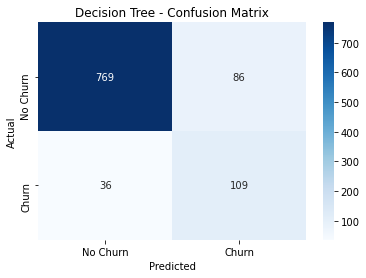

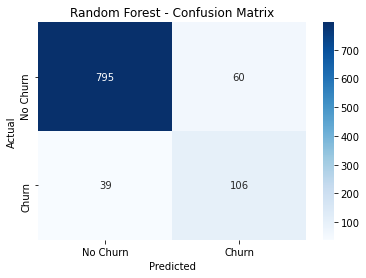

In [128]:
# Function to plot confusion matrix
def plot_conf_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'], 
                yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot
plot_conf_matrix(confusion_matrix(y_test, dt_y_pred), 'Decision Tree - Confusion Matrix')
plot_conf_matrix(confusion_matrix(y_test, rf_y_pred), 'Random Forest - Confusion Matrix')


**Decision Trees**

True Negatives (TN = 769):
These are customers who did not churn and were correctly predicted by the model as not churning.

False Positives (FP = 86):
These are customers who did not churn, but the model incorrectly predicted that they would.

False Negatives (FN = 36):
These are customers who actually churned, but the model missed them and predicted they would not churn.

True Positives (TP = 109):
These are customers who actually churned, and the model correctly identified them as churners.

**Random Forest**

True Negatives (TN = 795):
The model correctly predicted that 795 customers would not churn — a strong indicator of reliability for retaining customers.

False Positives (FP = 60):
These are non-churning customers incorrectly flagged as churn risks. This could lead to unnecessary interventions or resource usage on stable customers.

False Negatives (FN = 39):
The model missed 39 customers who actually churned. These are critical since they represent lost opportunities to retain customers.

True Positives (TP = 106):
The model accurately identified 106 customers who did churn, helping the business focus retention strategies where they matter most.




### 3.5.4 Classification report

In [129]:
# Classification Report for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred, target_names=['No Churn', 'Churn']))
# Classification Report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred, target_names=['No Churn', 'Churn']))

Decision Tree Classification Report:
              precision    recall  f1-score   support

    No Churn       0.96      0.90      0.93       855
       Churn       0.56      0.75      0.64       145

    accuracy                           0.88      1000
   macro avg       0.76      0.83      0.78      1000
weighted avg       0.90      0.88      0.89      1000

Random Forest Classification Report:
              precision    recall  f1-score   support

    No Churn       0.95      0.93      0.94       855
       Churn       0.64      0.73      0.68       145

    accuracy                           0.90      1000
   macro avg       0.80      0.83      0.81      1000
weighted avg       0.91      0.90      0.90      1000



The Decision Tree model correctly identified 31% of the actual churners, which is a much better recall for the minority class than Random Forest, which only captured 4% of the actual churners.

Although Random Forest has higher precision for churners (0.75), its very low recall means it fails to capture most churners, making it less suitable for churn prevention tasks where identifying potential churners is critical.

 ### 3.6 Plotting ROC Comparison of Logistic Regression, Decision Tree, and Random Forest

In [130]:
# Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_prepared)[:, 1] )
roc_auc = auc(fpr, tpr)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test_prepared)[:, 1])
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test_prepared)[:, 1])

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_prepared)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test_prepared)[:, 1])



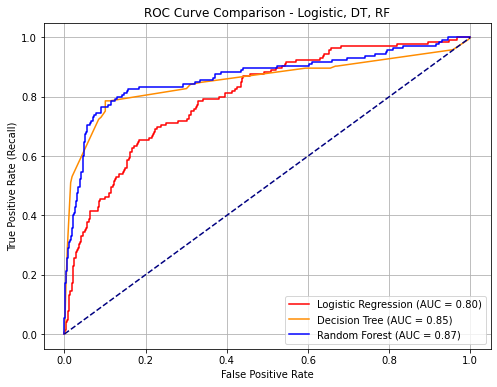

In [131]:
# Plotting ROC Curves for all three models
plt.figure(figsize=(8,6))

# Logistic Regression
plt.plot(fpr, tpr, color='red', label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))

# Decision Tree
plt.plot(fpr_dt, tpr_dt, color='darkorange', label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))

# Random Forest
plt.plot(fpr_rf, tpr_rf, color='blue', label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))

# Diagonal line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison - Logistic, DT, RF')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Random Forest has the best balance of sensitivity and specificity. It’s best at distinguishing between churn and no churn.

Decision Tree also performs well, slightly below Random Forest.

Logistic Regression performs the worst among the three based on AUC.

### 3.6.1 Cross validation 

In [132]:
# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model, X_train_resampled, y_train_resampled, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print(f'Decision Tree Cross-Validation Accuracy: {np.mean(dt_cv_scores):.2f} ± {np.std(dt_cv_scores):.2f}')
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print(f'Random Forest Cross-Validation Accuracy: {np.mean(rf_cv_scores):.2f} ± {np.std(rf_cv_scores):.2f}')



Decision Tree Cross-Validation Accuracy: 0.86 ± 0.01
Random Forest Cross-Validation Accuracy: 0.87 ± 0.01


These are mean accuracy scores obtained from cross-validation (e.g. 5-fold CV), where the model is trained and tested on different parts of the data.

0.86 means that, on average, the Decision Tree correctly classified 86% of the customers.

0.87 means that the Random Forest correctly classified 87% of the customers.

So, Random Forest is outperforming the Decision Tree by about 1 percentage points on average.

 ## 3.7 Hyper parameter Tuning


 Hyperparameter tuning is the process of optimizing the parameters that are not learned from the data but are set before training a model. These parameters (like max_depth in Decision Trees or n_estimators in Random Forest) control the behavior of the learning algorithm.

Tuning helps: Improve model performance,Reduce overfitting or underfitting and achieve a better balance between bias and variance

In [133]:
# Parameter distributions for Decision Tree
dt_param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# RandomizedSearchCV
dt_random_search = RandomizedSearchCV(
    dt, dt_param_dist, n_iter=50, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1
)

# Fit
dt_random_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_dt = dt_random_search.best_estimator_
print("Best Decision Tree Params:", dt_random_search.best_params_)

Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 12, 'min_samples_split': 8}


In [134]:
# parameter distributions for Random Forest
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}
# Initialize model
rf = RandomForestClassifier(random_state=42)
# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    rf, rf_param_dist, n_iter=50, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1
)
# Fit
rf_random_search.fit(X_train_resampled, y_train_resampled)
# Best model
best_rf = rf_random_search.best_estimator_
print("Best Random Forest Params:", rf_random_search.best_params_)


Best Random Forest Params: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 103}


### 3.7.2 Cross Validation After Hyperparameter tuning

In [135]:


# Decision Tree Cross-Validation
dt_cv_scores = cross_val_score(best_dt, X_train_resampled, y_train_resampled,
                               cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print(f' Decision Tree CV Accuracy: {np.mean(dt_cv_scores):.2f} ± {np.std(dt_cv_scores):.2f}')

# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(best_rf, X_train_resampled, y_train_resampled,
                               cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print(f' Random Forest CV Accuracy: {np.mean(rf_cv_scores):.2f} ± {np.std(rf_cv_scores):.2f}')


 Decision Tree CV Accuracy: 0.90 ± 0.01
 Random Forest CV Accuracy: 0.95 ± 0.01


#### Interpretation after hyperparameter tuning

1. **Decision trees (90%)**

A well-tuned Decision Tree is now performing much better than before (originally ~84%).

The low standard deviation (±0.01) suggests the model is stable across different folds.

However, still susceptible to overfitting on more complex datasets compared to ensemble methods.

2. **Random Forest (95%)**

Outstanding performance! Shows that tuning (e.g., n_estimators, max_depth, etc.) helped it generalize much better.

The ensemble approach and diversity among trees help reduce overfitting.

Standard deviation of ±0.01 means the model is very consistent and robust across data splits.

### 3.7.3 Plotting ROC Curves after Hyperparameter Tuning

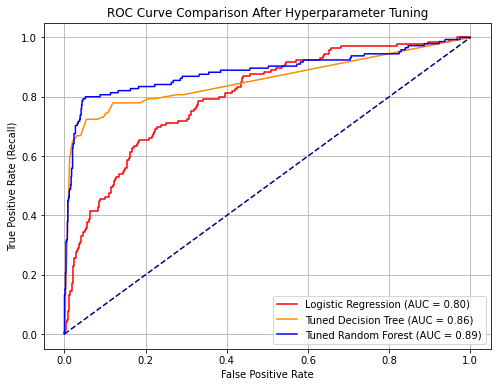

In [136]:
# Predict probabilities for ROC after tuning
# Logistic Regression stays same if not tuned
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_probs)
roc_auc_log = roc_auc_score(y_test, y_pred_probs)

# Tuned Decision Tree
dt_probs = best_dt.predict_proba(X_test_prepared)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
roc_auc_dt = roc_auc_score(y_test, dt_probs)

# Tuned Random Forest
rf_probs = best_rf.predict_proba(X_test_prepared)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = roc_auc_score(y_test, rf_probs)

# Plotting ROC Curves for all three models after hyperparameter tuning
plt.figure(figsize=(8, 6))

plt.plot(fpr_log, tpr_log, color='red', label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log))
plt.plot(fpr_dt, tpr_dt, color='darkorange', label='Tuned Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot(fpr_rf, tpr_rf, color='blue', label='Tuned Random Forest (AUC = {:.2f})'.format(roc_auc_rf))

# Diagonal line
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison After Hyperparameter Tuning')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

After hyperparameter tuning, the **Tuned Random Forest model**, with an AUC of **0.89**, demonstrated the best overall performance among the three classifiers. It showed a strong ability to correctly distinguish between customers who churn and those who do not. This high discriminative power makes it a strong candidate for real-world deployment, especially in scenarios where predictive accuracy is a top priority.

The **Tuned Decision Tree model**, with an AUC of **0.86**, also performed well, although it ranked slightly below the Random Forest. Nevertheless, it showed notable improvement compared to its pre-tuned version. One of its key advantages is interpretability—making it a suitable option in situations where understanding the model’s decision-making process is important to stakeholders or end users.

On the other hand, the **Logistic Regression model**, with an AUC of **0.80**, had the lowest performance among the three. While it still provides a reasonable baseline, its predictive power is limited compared to the tree-based models. However, it remains a viable option when model simplicity and transparency are prioritized, such as in highly regulated industries.


##  3.8 Feture importance Analysis

Feature importance analysis helps identify which input variables have the most influence on the model’s predictions. By evaluating the contribution of each feature, we gain insights into the key drivers of customer churn.

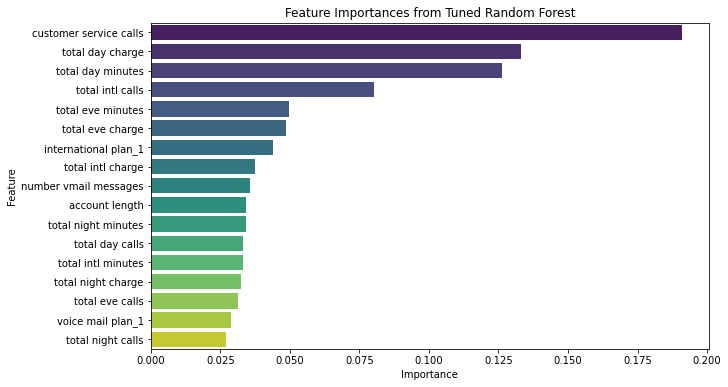

In [137]:
# Feature importance using tuned Random Forest
importances = best_rf.feature_importances_
# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X_train_prepared.columns, 'Importance': importances})
# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Tuned Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

From the plot above, customer service calls emerge as the most important feature in determining the likelihood of a customer churning. This suggests that customers who contact customer service frequently may be more likely to leave, potentially due to unresolved issues or dissatisfaction. It is closely followed by total day charge and total day minutes, indicating that higher daytime usage and associated charges could also be significant indicators of churn behavior.

## 4.0 Recommendation 

To effectively reduce churn and increase customer lifetime value, several data-driven strategies can be adopted based on feature importance and model performance.

First, since customer service calls are the most influential churn driver, it is essential to improve the quality of support. High call volumes often signal unresolved issues. Implementing satisfaction surveys after each interaction, applying sentiment analysis to call transcripts, and training agents for efficient, empathetic resolutions can significantly enhance customer experience.

Secondly, users with high total day charge and minutes are also prone to churn. Offering tailored daytime bundles, discounts, or loyalty rewards can help retain this segment. These users should be prioritized by using churn risk scores generated by the predictive model. Proactive retention efforts, such as automated alerts for check-ins or special offers, should target customers with high churn probabilities.

It is also important to establish feedback loops that integrate model insights into regular business reviews. Monitoring the effectiveness of interventions and retraining the model as customer behavior changes ensures the system remains adaptive and accurate.

Lastly, while the tuned Random Forest model provides superior predictive performance (AUC = 0.89), the Decision Tree model offers easier interpretability. Deploy Random Forest for operational use, but leverage Decision Tree visualizations to communicate insights clearly to business stakeholders.




## Conclusion

In this analysis, we successfully built and fine-tuned predictive models to identify customers at risk of churning. The tuned Random Forest model demonstrated the highest performance (AUC = 0.89), making it suitable for deployment, while the Decision Tree model offered valuable interpretability for stakeholder communication.

Key churn drivers such as customer service calls, total day charge, and total day minutes were identified, providing actionable insights. These findings support strategic recommendations, including improving customer service interactions, offering targeted loyalty incentives, and using churn risk scores to guide retention efforts.

Overall, the combination of predictive modeling and feature importance analysis equips the business with a data-driven approach to reduce churn, increase customer satisfaction, and enhance lifetime value.